In [7]:
# Basic for image processing

In [42]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

In [4]:
camera = ski.data.camera()

In [16]:
# basic commands for images
type(camera)
print(camera.shape)
camera.size
camera.min()
camera.max()
camera.mean()

(512, 512)


129.06072616577148

In [22]:
camera[:10]

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [201, 200, 200, ..., 191, 190, 190],
       [200, 200, 200, ..., 190, 190, 191],
       [200, 200, 199, ..., 190, 190, 190]], dtype=uint8)

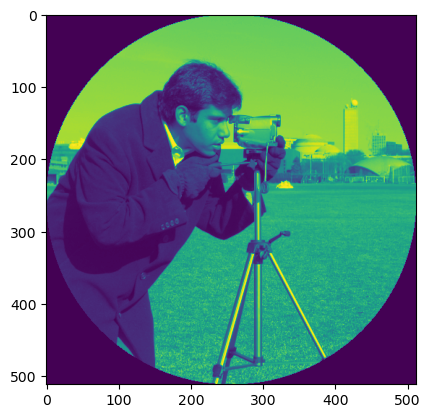

In [43]:
# masking image
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows/2, ncols/2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0
plt.imshow(camera)

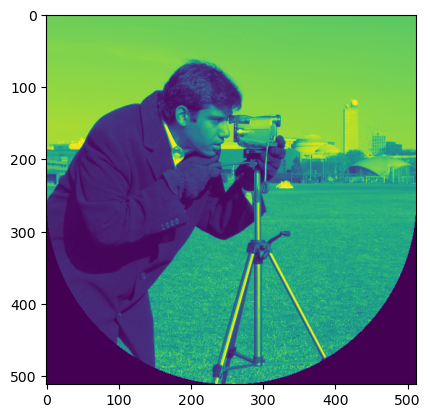

In [49]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera = ski.data.camera()
camera[lower_half_disk] = 0
plt.imshow(camera)

In [62]:
# color images
cat = ski.data.chelsea()
type(cat)
cat.shape
cat[:,:,0]

array([[143, 143, 141, ...,  45,  45,  45],
       [146, 145, 143, ...,  46,  45,  47],
       [148, 147, 146, ...,  48,  49,  50],
       ...,
       [ 92, 105, 132, ..., 172, 172, 172],
       [128, 139, 134, ..., 166, 166, 167],
       [139, 127, 125, ..., 161, 161, 162]], dtype=uint8)

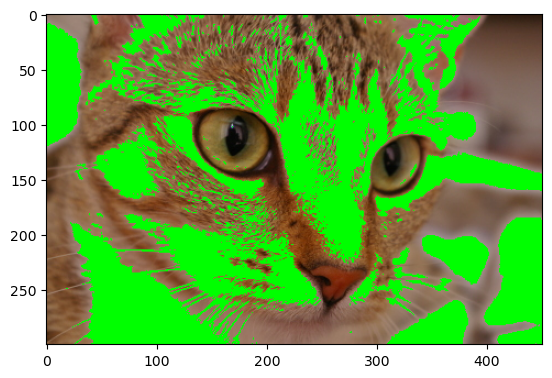

In [63]:
reddish = cat[:,:,0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from skimage import data
from skimage.color import rgb2hed, hed2rgb

In [5]:
# Example IHC image
ihc_rgb = data.immunohistochemistry()

In [7]:
# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

In [20]:
# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

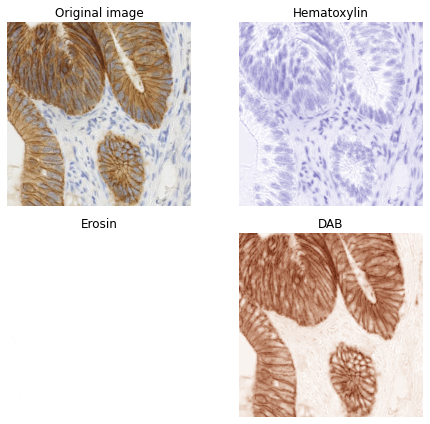

In [24]:
# Display
fig, axes = plt.subplots(2, 2, figsize=(7,6), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Erosin")

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis("off")
    
fig.tight_layout()


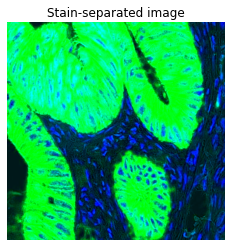

In [25]:
from skimage.exposure import rescale_intensity
# Rescale hematoxylin and DAB channels and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0,1), in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))

d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0,1), in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))

# Cast the two channels into an RGB image, as the blue and green channels respectively
zdh = np.dstack((null, d, h))

fig = plt.figure()
axis = plt.subplot(1,1,1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title("Stain-separated image")
axis.axis("off")
plt.show()


In [1]:
import cv2
import numpy as np
from skimage.color import rgb2hed
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

def color_deconvolution(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform color deconvolution to separate hematoxylin, eosin, and DAB
    hed = rgb2hed(image_rgb)
    
    # Rescale intensity to 0-255 for better visualization
    hematoxylin = rescale_intensity(hed[:, :, 0], out_range=(0, 255)).astype(np.uint8)
    dab = rescale_intensity(hed[:, :, 2], out_range=(0, 255)).astype(np.uint8)
    
    # Display the original image and the separated stains
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax = axes.ravel()
    ax[0].imshow(image_rgb)
    ax[0].set_title("Original Image")
    ax[1].imshow(hematoxylin, cmap='gray')
    ax[1].set_title("Hematoxylin")
    ax[2].imshow(dab, cmap='gray')
    ax[2].set_title("DAB")
    
    for a in ax:
        a.axis('off')
    
    plt.show()

# Example usage
# color_deconvolution('path/to/your/image.tif')


ModuleNotFoundError: No module named 'cv2'